In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input

In [2]:
#load Mnist data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [3]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),  # Dropout added

    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),  # Dropout added

    Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history=model.fit(x_train,y_train_cat,epochs=10,batch_size=64,validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7696 - loss: 0.7401 - val_accuracy: 0.9567 - val_loss: 0.1456
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9147 - loss: 0.2878 - val_accuracy: 0.9690 - val_loss: 0.1110
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9295 - loss: 0.2404 - val_accuracy: 0.9725 - val_loss: 0.0988
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9378 - loss: 0.2208 - val_accuracy: 0.9770 - val_loss: 0.0859
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9425 - loss: 0.2080 - val_accuracy: 0.9742 - val_loss: 0.0913
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9474 - loss: 0.1890 - val_accuracy: 0.9783 - val_loss: 0.0877
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9489 - loss: 0.1846 - val_accuracy: 0.9803 - val_loss: 0.0827
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9516 - loss: 0.1788 - val_accuracy: 0.

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 0s - 1ms/step - accuracy: 0.9748 - loss: 0.0975
Test Accuracy: 0.9748
Test Loss: 0.0975


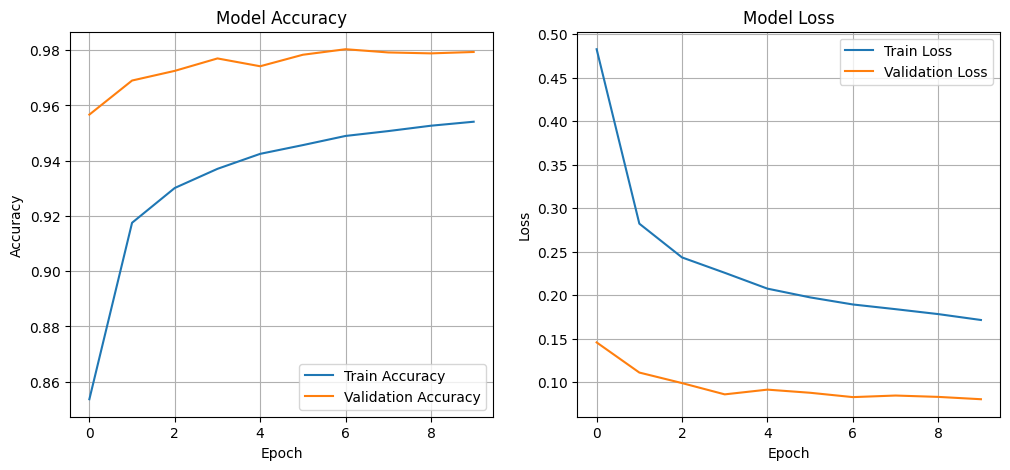

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()
